Packages which should be already installed

In [1]:
using CSV
using DataFrames
using Plots
using Polynomials

New package used in this lab.

In [2]:
# using Pkg
# Pkg.add("ApproxFun")

In [3]:
using ApproxFun

# Read data

In [4]:
file_path = "ecg_data.csv"

"ecg_data.csv"

In [5]:
data = CSV.read(file_path, DataFrame);

### Visualize two types of QRS complexes

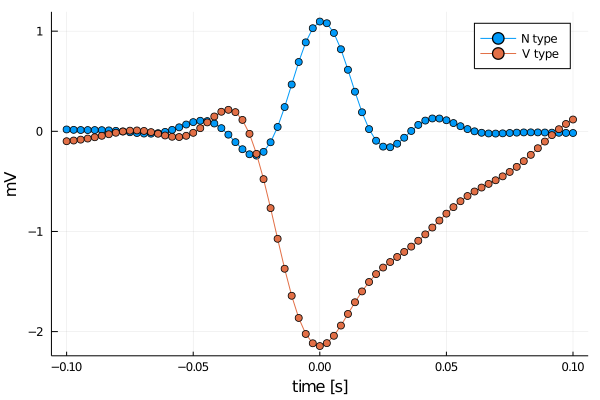

In [6]:
plot(data.time, [data.signalN, data.signalV], label=["N type" "V type"], markershape = :circle, linestyle = :solid,
    xlabel="time [s]", ylabel="mV")

In [7]:
# Normalize X axis to be -1..1
data.time *= 10;

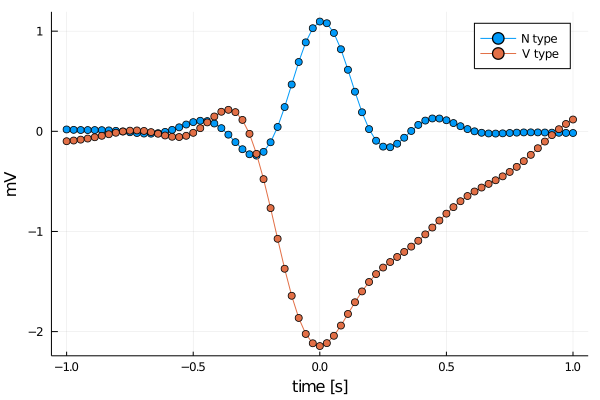

In [8]:
plot(data.time, [data.signalN, data.signalV], label=["N type" "V type"], markershape = :circle, linestyle = :solid,
    xlabel="time [s]", ylabel="mV")

## Orthogonal polynomials approximation

Aproximation in orthogonal Chebyshew base could be done using `ApproxFun` package. It should be installed if not present.

#### Use `ApproxFun`

In [9]:
reverse_time = reverse(data.time);

How can I choose order of approximation?

In [10]:
xx = data.time

73-element Array{Float64,1}:
 -1.0000000000000009
 -0.9722222222222232
 -0.9444444444444455
 -0.9166666666666679
 -0.8888888888888902
 -0.8611111111111125
 -0.8333333333333348
 -0.8055555555555571
 -0.7777777777777795
 -0.7500000000000018
 -0.7222222222222241
 -0.6944444444444442
 -0.6666666666666665
  ⋮
  0.6944444444444442
  0.7222222222222219
  0.7499999999999996
  0.7777777777777772
  0.8055555555555549
  0.8333333333333326
  0.8611111111111103
  0.888888888888888
  0.9166666666666656
  0.9444444444444433
  0.972222222222221
  0.9999999999999987

In [11]:
typeof(xx)

Array{Float64,1}

In [12]:
minimum(xx)

-1.0000000000000009

In [13]:
a = minimum(xx)..maximum(xx)

-1.0000000000000009..0.9999999999999987

In [14]:
function cheb_approx1(x, y)
    S = Chebyshev(minimum(x)..maximum(x));
    f = Fun(S, ApproxFun.transform(S,y));
    return f;
end

cheb_approx1 (generic function with 1 method)

In [15]:
f_normal = cheb_approx1(data.time, data.signalN)

Fun(Chebyshev(-1.0000000000000009..0.9999999999999987),[0.10780842155068496, -0.006166539467121902, -0.20364727843840905, 0.03141173190546377, 0.18391158866487844, -0.021290348687386676, -0.19993005228903935, 0.019686492822177583, 0.21343370241303833, -0.012465888897157544  …  1.1270003362783473e-5, 8.031405114363337e-6, 8.841297054206114e-6, 6.124867586686709e-6, 6.62440710204079e-6, 4.350918424172707e-6, 4.297537871606601e-6, 2.6460822887226234e-6, 2.0844918152654438e-6, 9.385625780920923e-7])

In [16]:
f_normal(0)

1.0960010950999992

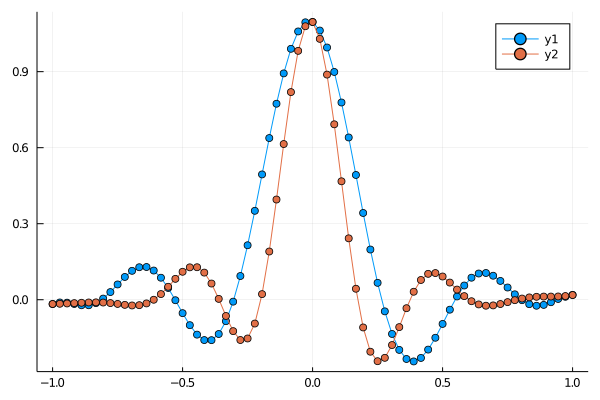

In [17]:
plot(data.time, f_normal, markershape = :circle, linestyle = :solid,)
plot!(reverse_time, data.signalN, markershape = :circle, linestyle = :solid,)

In [18]:
f_ventricular = cheb_approx1(data.time, data.signalV)

Fun(Chebyshev(-1.0000000000000009..0.9999999999999987),[-0.6139346046609587, 0.3165742297557231, 0.7432835175123425, -0.38455400850104066, -0.3328863921446602, 0.02928925461995204, 0.2773625955964232, 0.02411556458973453, -0.12957207387816957, -0.11237129975528685  …  -6.422615339454571e-5, 4.252592369180823e-5, -5.061685668719027e-5, 3.2688966103039924e-5, -3.765795522622984e-5, 2.310700037551939e-5, -2.488099057009356e-5, 1.3750667984166806e-5, -1.2385528939291749e-5, 4.532392509986476e-6])

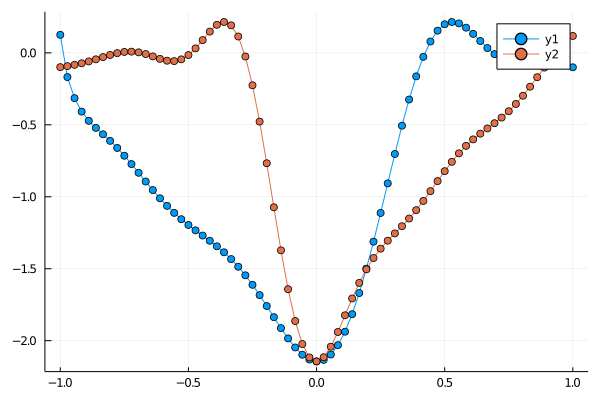

In [19]:
plot(data.time, f_ventricular, markershape = :circle, linestyle = :solid,)
plot!(data.time, data.signalV, markershape = :circle, linestyle = :solid,)

It looks like Xaxis for is reversed between plots - why?

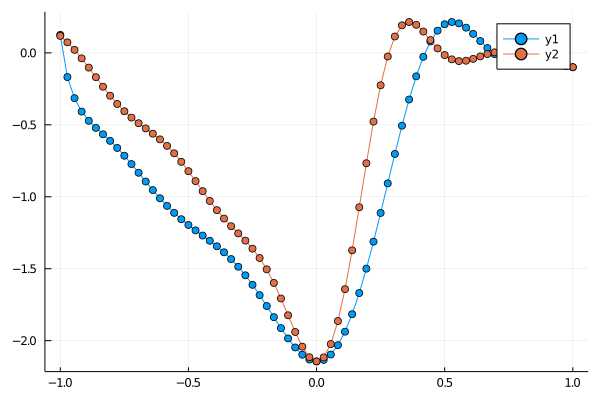

In [20]:
plot(data.time, f_ventricular, markershape = :circle, linestyle = :solid,)
plot!(reverse_time, data.signalV, markershape = :circle, linestyle = :solid,)

#### Use `Polynomials`

In [21]:
order = 8

8

In [22]:
n_cheb = fit(ChebyshevT, data.time, data.signalN, order)

ChebyshevT(0.07162401590896073⋅T_0(x) - 0.006644387485114718⋅T_1(x) - 0.13209066260795377⋅T_2(x) - 0.02174232666929393⋅T_3(x) + 0.13545458268240748⋅T_4(x) + 0.014933447032997297⋅T_5(x) - 0.09604503406235489⋅T_6(x) - 0.019708625831416086⋅T_7(x) + 0.1638028217377472⋅T_8(x))

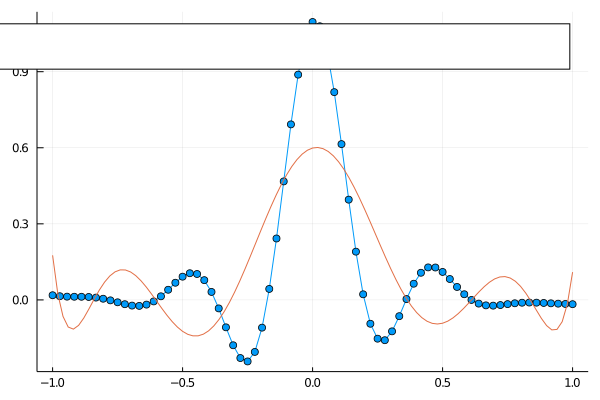

GKS: String is too long in routine TEXT


In [23]:
plot(data.time, data.signalN, markershape = :circle, linestyle = :solid,)
plot!(n_cheb)

In [24]:
v_cheb = fit(ChebyshevT, data.time, data.signalV, order)

ChebyshevT(- 0.4321351650233904⋅T_0(x) - 0.14668670318718283⋅T_1(x) + 0.6201890783598158⋅T_2(x) + 0.3651787735902061⋅T_3(x) - 0.3282667452358863⋅T_4(x) - 0.14895969715864354⋅T_5(x) + 0.22938102406657665⋅T_6(x) + 0.07758587651820868⋅T_7(x) - 0.2446329964159967⋅T_8(x))

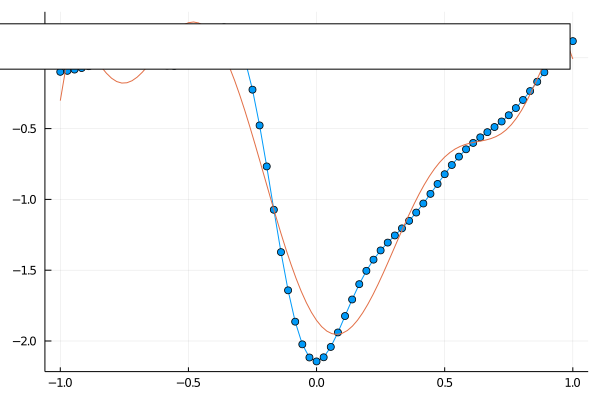

GKS: String is too long in routine TEXT


In [25]:
plot(data.time, data.signalV, markershape = :circle, linestyle = :solid,)
plot!(v_cheb)

##### Test ortogonality

In [26]:
n_cheb = fit(ChebyshevT, data.time, data.signalN, 3)

ChebyshevT(0.04804599205522414⋅T_0(x) - 0.010601957570122653⋅T_1(x) - 0.1898335995738169⋅T_2(x) - 0.027117555461219325⋅T_3(x))

In [27]:
n_cheb = fit(ChebyshevT, data.time, data.signalN, 6)

ChebyshevT(0.06372328251639574⋅T_0(x) - 0.0033257466197135557⋅T_1(x) - 0.15112616660429512⋅T_2(x) - 0.0173513529515559⋅T_3(x) + 0.10514413255803871⋅T_4(x) + 0.022335879622099646⋅T_5(x) - 0.15367936022933992⋅T_6(x))

Why first coefficients are not the same?

### Use `ChebyshevApprox`
<!-- Pkg.add("ChebyshevApprox") -->

In [28]:
using Pkg
Pkg.add("ChebyshevApprox")

   Updating registry at `C:\Users\TadeuszSatlawa\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\TadeuszSatlawa\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\TadeuszSatlawa\.julia\environments\v1.5\Manifest.toml`


In [29]:
using ChebyshevApprox

In [30]:
dom = [2.0,-3.0] # taken from https://github.com/RJDennis/ChebyshevApprox.jl/blob/master/test/test_1d.jl

2-element Array{Float64,1}:
  2.0
 -3.0

In [31]:
w = chebyshev_weights(data.signalN, data.time, 9, dom)

10-element Array{Float64,1}:
  0.10780842155068497
  0.23301255649684316
 -0.14020845146906172
 -0.13790863123894267
  0.13704520089220842
  0.2089368754846129
 -0.05323613771085716
 -0.21579587858232965
 -0.031816331594394544
  0.17295575290707482

In [32]:
y_approx = map(x -> clenshaw_evaluate(w, [x], dom), data.time);

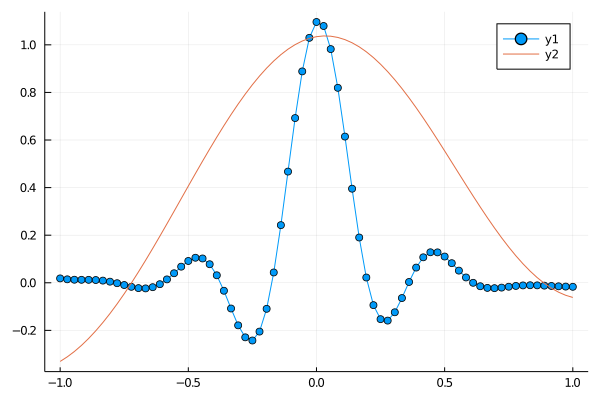

In [33]:
plot(data.time, data.signalN, markershape = :circle, linestyle = :solid,)
plot!(data.time, y_approx)

### Approximate with different orders

### Automatic selection of order

## Mgr

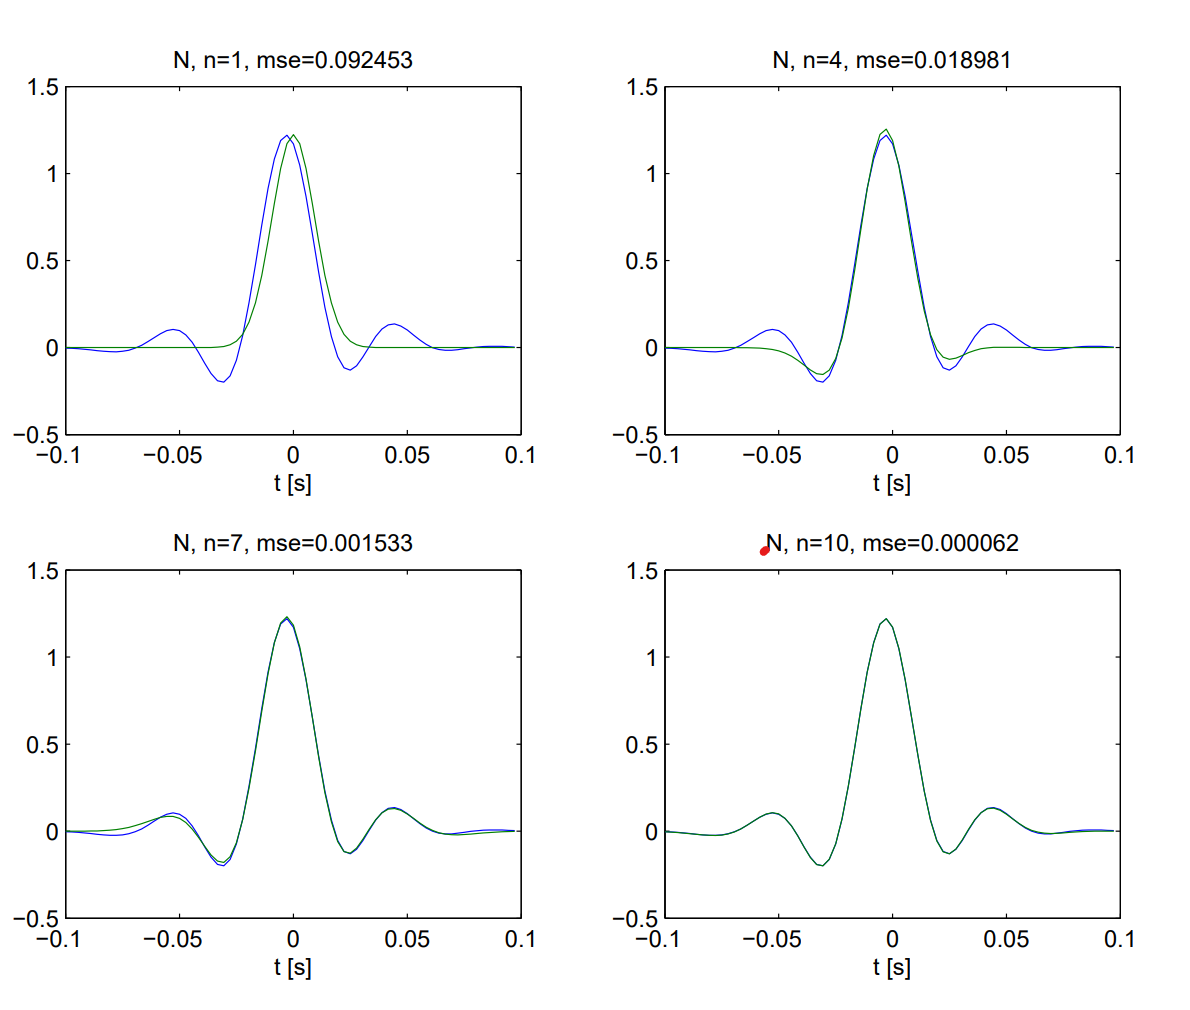

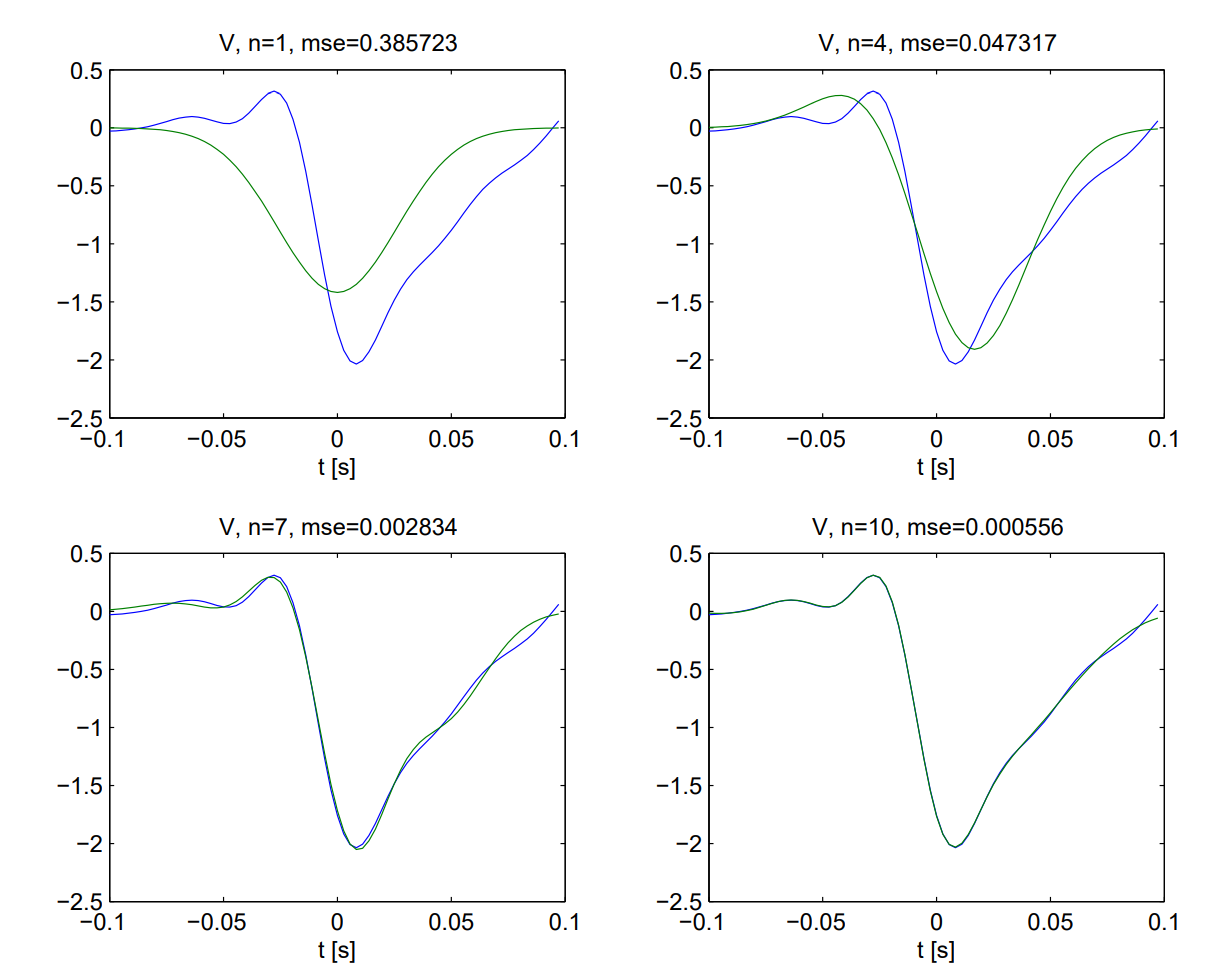

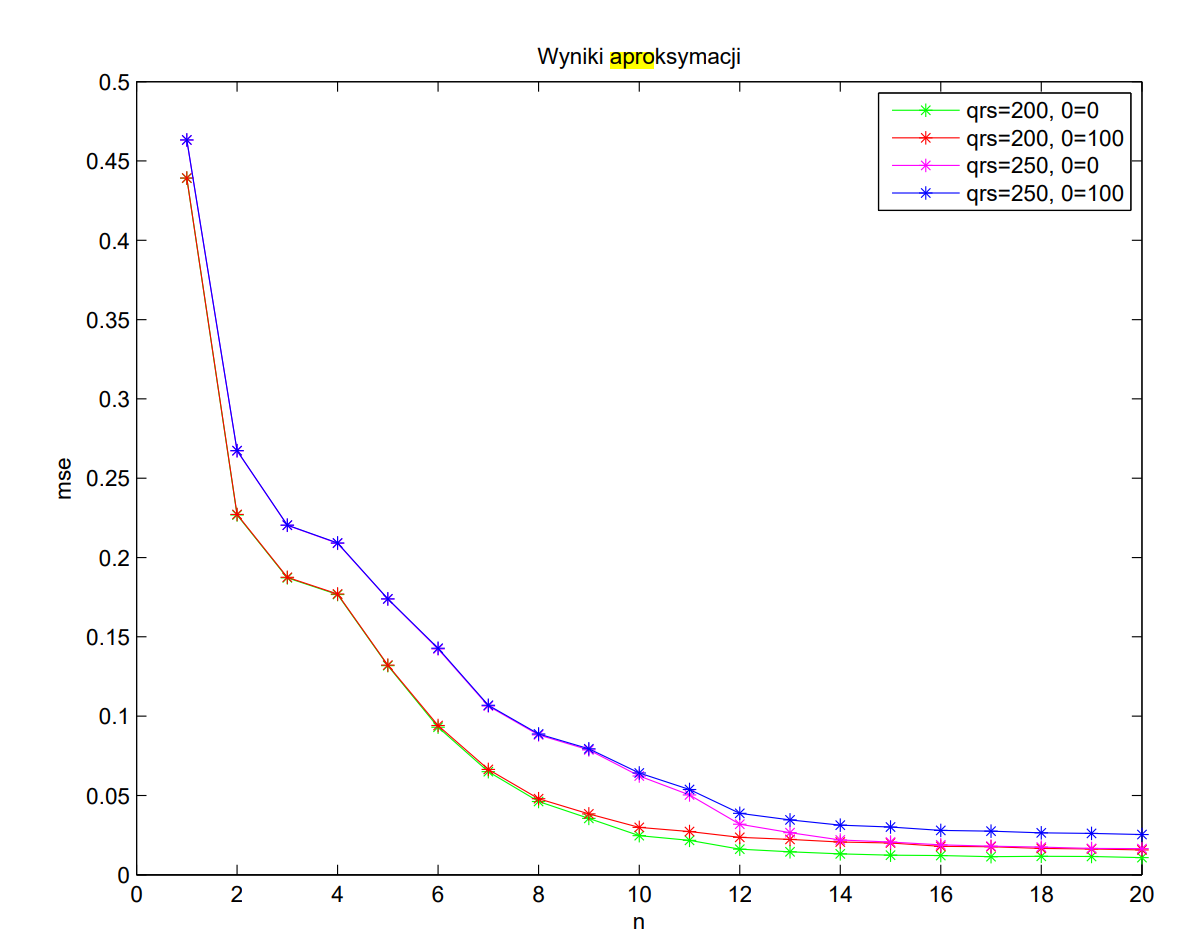

Baza
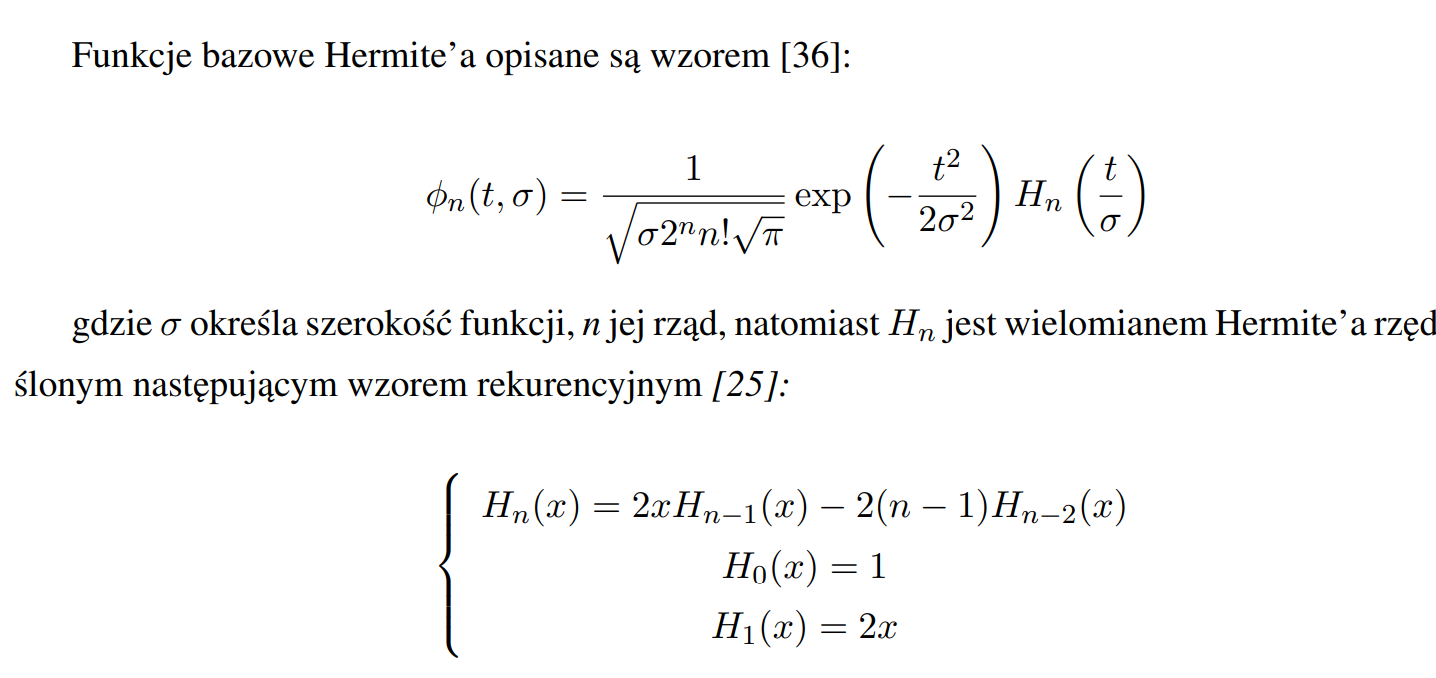